In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
## Download the two csv files
#############################
df_train = pd.read_csv('house-prices_cleaned_train.csv')
df_test = pd.read_csv('house-prices_cleaned_test.csv')
df_unseen = pd.read_csv('house-prices_cleaned_unseen.csv')

print('df_train.shape = ',df_train.shape)
print('df_test.shape = ',df_test.shape)
print('df_unseen.shape = ',df_unseen.shape)

df_train.shape =  (1799, 79)
df_test.shape =  (486, 79)
df_unseen.shape =  (500, 78)


# Feature encoding

We consider as in the cleaning file our four categories of columns.

In [3]:
## The four categories of columns
#################################

continuous_col = ['SalePrice','Screen Porch','Enclosed Porch','Misc Val','Pool Area',
                  'BsmtFin SF 2','1st Flr SF','Open Porch SF','2nd Flr SF','Mas Vnr Area',
                  'Lot Area','3Ssn Porch','Gr Liv Area','Garage Area','Total Bsmt SF',
                  'Lot Frontage','BsmtFin SF 1','Bsmt Unf SF','Low Qual Fin SF',
                  'Wood Deck SF','Year Built','Year Remod/Add']

nominal_col = ['MS Zoning','Street','Alley','Land Contour','Lot Config','Neighborhood',
                 'Condition 1','Condition 2','Bldg Type','House Style','Roof Style',
                 'Roof Matl','Exterior 1st','Exterior 2nd','Mas Vnr Type','Foundation',
                 'Heating','Central Air','Garage Type','Misc Feature','Sale Type',
                 'Sale Condition']

discrete_col = ['Bsmt Full Bath','Bsmt Half Bath','Full Bath','Half Bath','Bedroom AbvGr',
                'Kitchen AbvGr','TotRms AbvGrd','Fireplaces','Garage Cars','Mo Sold',
                'Yr Sold','MS SubClass']

ordinal_col = ['Lot Shape','Utilities','Land Slope','Overall Qual','Overall Cond',
               'Exter Qual','Exter Cond','Bsmt Qual','Bsmt Cond','Bsmt Exposure',
               'BsmtFin Type 1','BsmtFin Type 2','Heating QC','Electrical','Kitchen Qual',
               'Functional','Fireplace Qu','Garage Finish','Garage Qual','Garage Cond',
               'Paved Drive','Pool QC','Fence']

## We check that we have the correct size
len(continuous_col)+len(nominal_col)+len(ordinal_col)+len(discrete_col)

79

## Nominal + Discrete

These two types are those we want to apply one-hot encoding process. 

In [4]:
encoding_set = set(discrete_col).union(set(nominal_col))
encoding_col = list(encoding_set)

## Continuous features

For these columns, we will investigate an important aspect : see if there is a too large occurence of a certain value; typically a column having too much zeros. 


In [5]:
print('Number of continuous columns = ',len(continuous_col))

Number of continuous columns =  22


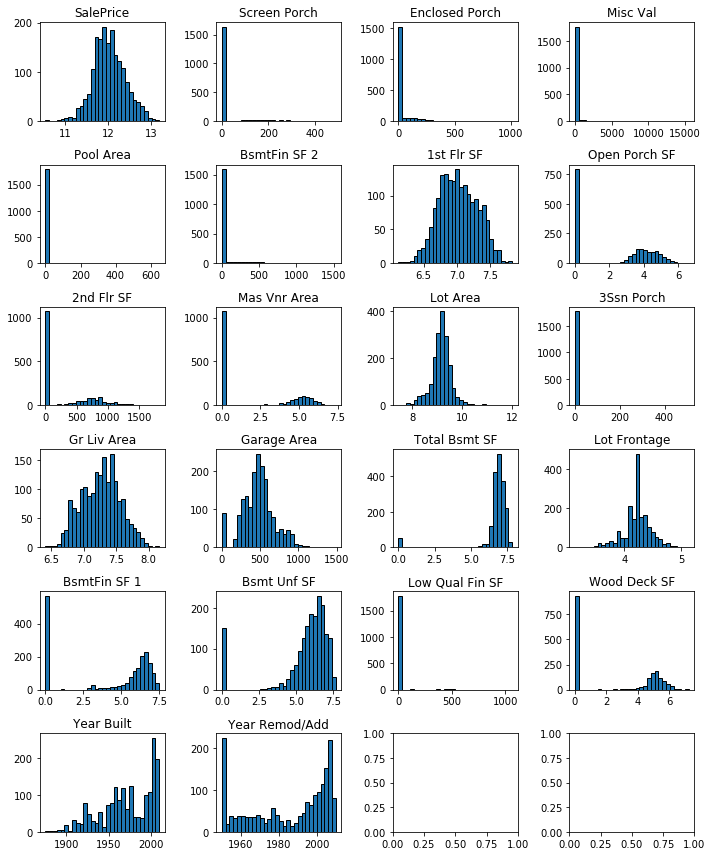

In [6]:
## Plot the distributions using histograms
##########################################
fig, axes = plt.subplots(6,4,figsize=(10,12))

for c,ax in zip(continuous_col,axes.ravel()):
    ax.hist(df_train[c].values,bins=30,edgecolor='black')
    ax.set_title(c)
plt.tight_layout()
plt.show()

We see that we have several variables having a lot of zero values. One of the strategy to deal with these features and not build a biaised model is to create, for each such variable, an associated binary column that indicates if the value is zero or not. For example = $0$ if the value is zero and $1$ otherwise.

In [7]:
## Select those columns with a threshold of 100
###############################################
zeros_col = [col for col in continuous_col if ((df_train[col]==0).sum() > 100)]           

We can also separate in 'Year Built' and 'Year Remod/Add' the points having >= 2000 and also the modification from 1950 in 'Year Remod/Add'.

In [8]:
date_2000 = ['Year Built','Year Remod/Add']
date_1950 = 'Year Remod/Add'

## Ordinal features

### Encoding

We will look carefully at the ordinal columns and will replace their string values by numerical values.

In [9]:
## Get all possible values of each ordinal feature
##################################################
for c in ordinal_col:
    values =list(df_train[c].value_counts().index.values)
    print(c+' :',values)

Lot Shape : ['Reg', 'IR1', 'IR2', 'IR3']
Utilities : ['AllPub', 'NoSewr', 'NoSeWa']
Land Slope : ['Gtl', 'Mod', 'Sev']
Overall Qual : [5, 6, 7, 8, 4, 9, 3, 10, 2, 1]
Overall Cond : [5, 6, 7, 8, 4, 3, 9, 2, 1]
Exter Qual : ['TA', 'Gd', 'Ex', 'Fa']
Exter Cond : ['TA', 'Gd', 'Fa', 'Ex']
Bsmt Qual : ['TA', 'Gd', 'Ex', 'Fa', 'None', 'Po']
Bsmt Cond : ['TA', 'Gd', 'Fa', 'None', 'Po', 'Ex']
Bsmt Exposure : ['No', 'Av', 'Mn', 'Gd', 'None']
BsmtFin Type 1 : ['GLQ', 'Unf', 'ALQ', 'Rec', 'BLQ', 'LwQ', 'None']
BsmtFin Type 2 : ['Unf', 'Rec', 'LwQ', 'None', 'BLQ', 'ALQ', 'GLQ']
Heating QC : ['Ex', 'TA', 'Gd', 'Fa', 'Po']
Electrical : ['SBrkr', 'FuseA', 'FuseF', 'FuseP', 'Mix']
Kitchen Qual : ['TA', 'Gd', 'Ex', 'Fa', 'Po']
Functional : ['Typ', 'Min2', 'Min1', 'Mod', 'Maj1', 'Maj2', 'Sev']
Fireplace Qu : ['None', 'Gd', 'TA', 'Fa', 'Po', 'Ex']
Garage Finish : ['Unf', 'RFn', 'Fin', 'None']
Garage Qual : ['TA', 'None', 'Fa', 'Gd', 'Po', 'Ex']
Garage Cond : ['TA', 'None', 'Fa', 'Po', 'Gd', 'Ex']
Paved Dr

In [10]:
## astype = float64
###################
df_train[['Overall Cond','Overall Qual']] = df_train[['Overall Cond',
                                                      'Overall Qual']].astype('float64')
df_test[['Overall Cond','Overall Qual']] = df_test[['Overall Cond',
                                                      'Overall Qual']].astype('float64')
df_unseen[['Overall Cond','Overall Qual']] = df_unseen[['Overall Cond',
                                                      'Overall Qual']].astype('float64')

###############################################

In each of the above list, we order the elements with respect to the order provides by the txt file

In [11]:
## Order each list of values and create a dictionnary
#####################################################

## The ordered dictionnary
##########################
Dico_values = {
'Lot Shape' : ['Reg', 'IR1', 'IR2', 'IR3'],
'Utilities' : ['AllPub', 'NoSewr', 'NoSeWa'],
'Land Slope' : ['Gtl', 'Mod', 'Sev'],
'Overall Qual' : [ 10.0, 9.0, 6.0, 7.0, 6.0, 5.0, 4.0, 3.0, 2.0, 1.0],
'Overall Cond' : [9.0, 8.0, 7.0, 6.0, 5.0, 4.0, 3.0, 2.0, 1.0],
'Exter Qual' : ['Ex','Gd','TA', 'Fa','Po'],
'Exter Cond' : ['Ex','Gd','TA', 'Fa','Po'],
'Bsmt Qual' : ['Ex','Gd','TA', 'Fa','Po','None'],
'Bsmt Cond' : ['Ex','Gd','TA', 'Fa','Po','None'],
'Bsmt Exposure' : ['Gd','Av','Mn','No','None'],
'BsmtFin Type 1' : ['GLQ','ALQ','BLQ','Rec', 'LwQ','Unf','None'],
'BsmtFin Type 2' : ['GLQ','ALQ','BLQ','Rec', 'LwQ','Unf','None'],
'Heating QC' : ['Ex','Gd','TA', 'Fa','Po'],
'Electrical' : ['SBrkr', 'FuseA', 'FuseF', 'FuseP' ,'Mix'],
'Kitchen Qual' : ['Ex','Gd','TA', 'Fa','Po'],
'Functional' : ['Typ', 'Min1', 'Min2', 'Mod', 'Maj1', 'Maj2' ,'Sev' ,'Sal'],
'Fireplace Qu' : ['Ex','Gd','TA', 'Fa','Po','None'],
'Garage Finish' : ['Fin','RFn','Unf','None'],
'Garage Qual' : ['Ex','Gd','TA', 'Fa','Po','None'],
'Garage Cond' : ['Ex','Gd','TA', 'Fa','Po','None'],
'Paved Drive' : ['Y','P','N'],
'Pool QC' : ['Ex','Gd','TA', 'Fa','Po','None'],
'Fence' : ['GdPrv','MnPrv', 'GdWo', 'MnWw','None']
}

From this dictionnary, we create a new one which assigns 1 to the maximum and 0 to the minimum.

In [12]:
## The dictionnary encoding
###########################
Dictionnary_encoding = {}

## The columns
for col in Dico_values.keys():
    
    ## The size of the associated list
    size = len(Dico_values[col])
    
    ## The dictionnary of values associated to the column col
    dico = {}
    for i in range(size):
        string = (Dico_values[col])[i]
        dico[string]= (size-i-1)/(size-1)
    
    ## Fill the dictionnary encoding
    Dictionnary_encoding[col] = dico

In each column, we replace string values by numerical values with the rule that we assign 0 to the minimum and 1 to the maximum. This can be achivied using a loops and string functions.

In [13]:
## The function that encodes discrete columns
#############################################

def Encode_Discrete(df):
    
    ## Work on a copy
    df = df.copy()
    
    ## Replace in each column
    for col in Dictionnary_encoding.keys():
        dico = Dictionnary_encoding[col]
        df[col].replace(to_replace = dico,inplace=True) 

    return df

In [14]:
## Do the modifications on the three df
#######################################
df_train = Encode_Discrete(df_train)
df_test = Encode_Discrete(df_test)
df_unseen = Encode_Discrete(df_unseen)

### Too large occurence of certain values

We check again if there are some discrete columns having a too frequent value.

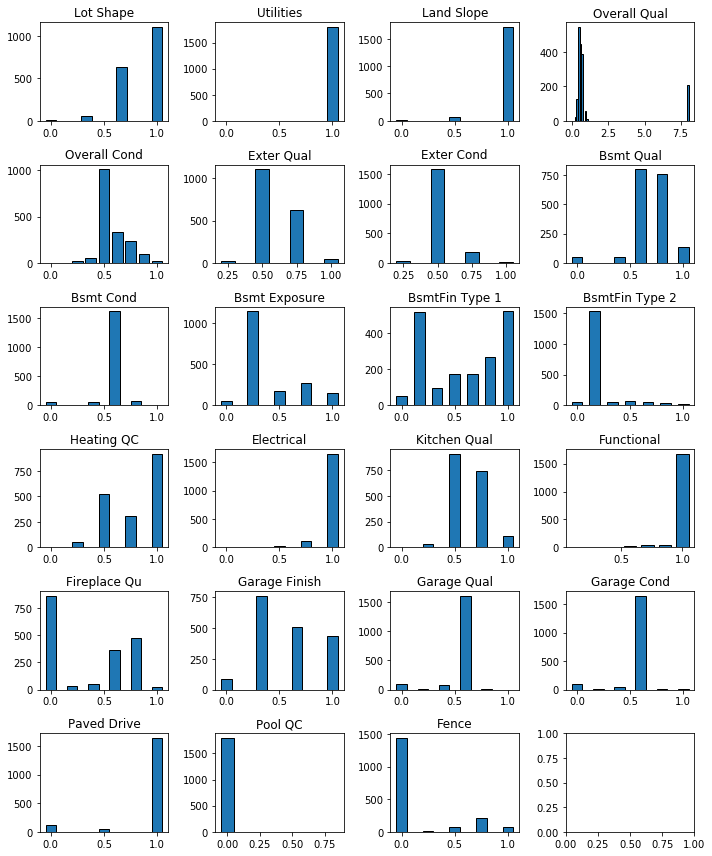

In [15]:
## Bar plot of the features
###########################
fig, axes = plt.subplots(6,4,figsize=(10,12))

for c,ax in zip(ordinal_col,axes.ravel()):
    ax.bar(df_train[c].value_counts().index,
           df_train[c].value_counts().values,width = 0.1,edgecolor='black')
    ax.set_title(c)
    
plt.tight_layout()
plt.show()

For the variables having an occurence greater than 1500, we will add an extra binary column that indicates if the value is the frequent one or not. 

In [16]:
too_many_col = [x for x in ordinal_col if (
                                (df_train[x].value_counts().max()>=1500))]

## The preprocessing function

Let's just recall all the different group of columns that we established

In [17]:
#### The columns to one-hot encode (nominal + discrete) :
encoding_col;

#### The columns where we separate the zero value
zeros_col;

#### The columns where we separate the most frequent value
too_many_col;

#### We separate the date <= 2000
date_2000;

#### We separate the date = 1950
date_1950;

In [18]:
## Definition of Preprocessing function
#######################################

def binary(x):
    if x==0:
        return 1
    else:
        return 0
    
def binary_2000(x):
    if x<=2000:
        return 1
    else:
        return 0

## The Preprocessing function
def Preprocess(df1,df2,df3):
    
    ## Better to work on copies
    df1 = df1.copy()
    df2 = df2.copy()
    df3 = df3.copy()
    
    ## Memorize the size of each dfi
    size_1 = len(df1)
    size_2 = len(df2)
    size_3 = len(df3)
    
    ## Concatenate the three DataFrames
    df = pd.concat([df1,df2,df3],sort=True)
    
    ## One-hot encoding
    df = pd.get_dummies(df,columns=encoding_col) 
    
    ## Create an additional column with zero and 1
    for col in zeros_col:
        df[col+'= 0'] = df[col].apply(binary)
        
    ## Create an additional column with zero and 1
    for col in too_many_col:
        ## We take the most frequent value in the training frame
        frequent_value = df_train[col].value_counts().idxmax()
        df[col+' = '+str(frequent_value)] = (df[col]-frequent_value).apply(binary)
    
    ## Adding a column telling if the date is <= 2000
    for col in date_2000:
        df[col+'_less_2000'] = df[col].apply(binary_2000)
    
    ## The same for 1950
    df[date_1950+' = 1950'] = (df[date_1950]-1950).apply(binary)
    
    ## Get back the original frames
    df1 = df.iloc[0:size_1,:]
    df2 = df.iloc[size_1:size_1+size_2,:]
    df3 = df.iloc[size_1+size_2:size_1+size_2+size_3,:]
    
    return df1,df2,df3

In [19]:
## Preprocess our three frames
##############################
df_train,df_test,df_unseen = Preprocess(df_train,df_test,df_unseen)

In [20]:
## Print the different shapes
#############################
print('train : ',df_train.shape)
print('test : ',df_test.shape)
print('unseen : ',df_unseen.shape)

train :  (1799, 326)
test :  (486, 326)
unseen :  (500, 326)


It remains to check if we have zero columns in df_train, in which case we have to find a solution to avoid this problem.

In [21]:
## Select the zero columns in df_train
problem_cols = list((df_train==0).sum()[((df_train == 0).sum() == len(df_train))].index)

problem_cols 

['Roof Matl_Membran',
 'Roof Matl_Metal',
 'Roof Matl_Roll',
 'Neighborhood_BrDale',
 'Neighborhood_Landmrk',
 'Fireplaces_4',
 'Garage Cars_5.0',
 'Exterior 2nd_Other',
 'Exterior 2nd_PreCast',
 'Condition 2_PosN',
 'Condition 2_RRNn',
 'Exterior 1st_PreCast',
 'Heating_Floor']

We will do the following : for each group of zero columns (for example 'Condition 2_PosN',
'Condition 2_RRNn' is a group), we look for the non-zero column of the same group and having the greatest number of zeros. Once we did this, we aggregate the zero cols with this one.

In [22]:
groups = ['Condition 2','Exterior 1st','Fireplaces','Neighborhood','Heating',
            'Exterior 2nd','Garage','Roof Matl']

for group in groups:
    
    ## Get the zero columns of the current group
    zero_group = [x for x in problem_cols if group in x]
    
    ## Get all nominal (after one-hot encoding) columns of the same group
    Exclude = continuous_col+ordinal_col+zero_group
    all_group = [x for x in df_train.columns if np.logical_and(x not in Exclude,
                                                        group in x)]
    
    ## Get the column having the greatest number of zero
    aggregate_col = (df_train[all_group]==0).sum().idxmax()
    
    ## Replace this colum by Other and drop the others
    df_train[group+'_Other_Value'] = df_train[aggregate_col]
    df_test[group+'_Other_Value'] = df_test[aggregate_col]
    df_unseen[group+'_Other_Value'] = df_unseen[aggregate_col]

    to_drop = [aggregate_col]+zero_group
    df_train = df_train.drop(to_drop,axis=1)
    df_test = df_test.drop(to_drop,axis=1)
    df_unseen = df_unseen.drop(to_drop,axis=1)  

In [23]:
## Check if it remains zero columns
(df_train==0).sum()[((df_train == 0).sum() == len(df_train))].index

Index([], dtype='object')

In [24]:
print('train : ',df_train.shape)
print('test : ', df_test.shape)
print('unseen : ',df_unseen.shape)

train :  (1799, 313)
test :  (486, 313)
unseen :  (500, 313)


In [25]:
## We create the csv_file
#########################
df_train.to_csv('house-prices_preprocess_train.csv',index=False, encoding='utf-8')
df_test.to_csv('house-prices_preprocess_test.csv',index=False, encoding='utf-8')
df_unseen.to_csv('house-prices_preprocess_unseen.csv',index=False,encoding='utf-8')